**Upload the dataset**

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving archive (5).zip to archive (5) (2).zip


**Unzip the file and extract it**

In [ ]:
import zipfile, os

zip_path = list(uploaded.keys())[0]  # Get uploaded file name
extract_folder = "battery_dataset"
os.makedirs(extract_folder, exist_ok=True)

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

print("✅ Extracted files:", os.listdir(extract_folder))

✅ Extracted files: ['TripB15.csv', 'TripA29.csv', 'TripB18.csv', 'TripB30.csv', 'TripB17.csv', 'TripB07.csv', 'TripB20.csv', 'TripA11.csv', 'TripB11.csv', 'TripB34.csv', 'TripB26.csv', 'TripA06.csv', 'TripA14.csv', 'TripB09.csv', 'TripA22.csv', 'TripA15.csv', 'TripB32.csv', 'TripB01.csv', 'TripA32.csv', 'TripA27.csv', 'TripA03.csv', 'TripA13.csv', 'TripB14.csv', 'TripB23.csv', 'TripB13.csv', 'TripB25.csv', 'TripA19.csv', 'TripB04.csv', 'TripA25.csv', 'TripA07.csv', 'TripB16.csv', 'TripB28.csv', 'TripA26.csv', 'TripB08.csv', 'TripA21.csv', 'TripA24.csv', 'TripA12.csv', 'TripB38.csv', 'TripB19.csv', 'TripA16.csv', 'TripA28.csv', 'TripB27.csv', 'TripA08.csv', 'TripB24.csv', 'TripA01.csv', 'TripB33.csv', 'TripB22.csv', 'TripA17.csv', 'TripB03.csv', 'TripA30.csv', 'TripB06.csv', 'readin.m', 'TripA05.csv', 'TripA10.csv', 'TripA02.csv', 'TripB21.csv', 'TripB35.csv', 'TripB02.csv', 'Overview.xlsx', 'TripB31.csv', 'TripB37.csv', 'TripA18.csv', 'TripB29.csv', 'TripA23.csv', 'TripA09.csv', 'TripB

**Since it contains 72 files combine(merge) all the files to create just one dataset**

In [ ]:
import pandas as pd
import os

# Folder where you extracted all CSVs
folder_path = "battery_dataset"

# Collect all CSV file paths
csv_files = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith(".csv")]

# Read and combine all CSVs
df_all = pd.concat(
    [pd.read_csv(f, sep=';', encoding='ISO-8859-1', low_memory=False) for f in csv_files],
    ignore_index=True
)

print("✅ Combined shape:", df_all.shape)
print("✅ Columns:", list(df_all.columns)[:10], "...")


✅ Combined shape: (1094793, 50)
✅ Columns: ['Time [s]', 'Velocity [km/h]', 'Elevation [m]', 'Throttle [%]', 'Motor Torque [Nm]', 'Longitudinal Acceleration [m/s^2]', 'Regenerative Braking Signal ', 'Battery Voltage [V]', 'Battery Current [A]', 'Battery Temperature [°C]'] ...


**Preprocess the data and make it ready for analysis(EDA)**

✅ Data Loaded Successfully!
Shape: (1094793, 50)

Columns:
 ['Time [s]', 'Velocity [km/h]', 'Elevation [m]', 'Throttle [%]', 'Motor Torque [Nm]', 'Longitudinal Acceleration [m/s^2]', 'Regenerative Braking Signal ', 'Battery Voltage [V]', 'Battery Current [A]', 'Battery Temperature [°C]', 'max. Battery Temperature [°C]', 'SoC [%]', 'displayed SoC [%]', 'min. SoC [%]', 'max. SoC [%)', 'Heating Power CAN [kW]', 'Heating Power LIN [W]', 'Requested Heating Power [W]', 'AirCon Power [kW]', 'Heater Signal', 'Heater Voltage [V]', 'Heater Current [A]', 'Ambient Temperature [°C]', 'Ambient Temperature Sensor [°C]', 'Coolant Temperature Heatercore [°C]', 'Requested Coolant Temperature [°C]', 'Coolant Temperature Inlet [°C]', 'Coolant Volume Flow +500 [l/h]', 'Heat Exchanger Temperature [°C]', 'Cabin Temperature Sensor [°C]', 'Temperature Coolant Heater Inlet [°C]', 'Temperature Coolant Heater Outlet [°C]', 'Temperature Heat Exchanger Outlet [°C]', 'Temperature Defrost lateral left [°C]', 'Tempera

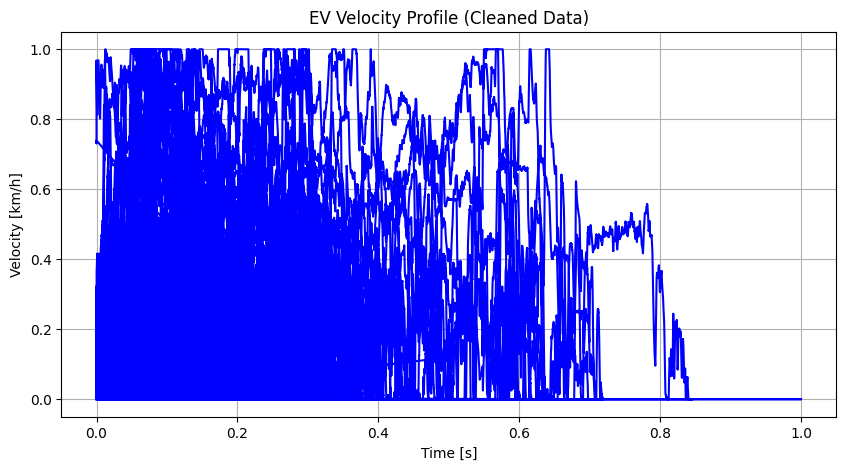


🎯 Dataset is now fully cleaned and ready for Exploratory Data Analysis (EDA)!


In [ ]:
# =====================================
# EV Trip Data – Cleaning & Preprocessing Pipeline
# =====================================

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

# ---------- 1️⃣ Load & Merge All CSVs ----------
folder_path = "battery_dataset"  # change if different
csv_files = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith(".csv")]

# Read all CSVs with correct delimiter and encoding
df = pd.concat(
    [pd.read_csv(f, sep=';', encoding='ISO-8859-1', low_memory=False) for f in csv_files],
    ignore_index=True
)

print("✅ Data Loaded Successfully!")
print("Shape:", df.shape)
print("\nColumns:\n", df.columns.tolist())
print("\nMissing Values Summary:\n", df.isnull().sum().head(10))
print("\nBasic Info:")
print(df.info())
print("\nDescriptive Stats:\n", df.describe().T.head(10))
print("\nSample Data:\n", df.head(5))

# ---------- 2️⃣ Handle Missing Values ----------
print("\nHandling Missing Values...")
df = df.dropna(how='all')               # remove fully empty rows
df = df.fillna(0)                       # fill remaining missing cells with 0
df = df.loc[:, ~df.columns.duplicated()]  # remove duplicate columns

# ---------- 3️⃣ Convert Data Types ----------
print("\nConverting Data Types...")
for col in df.columns:
    if col != 'Time [s]':
        df[col] = pd.to_numeric(df[col], errors='coerce')
df = df.fillna(0)

# ---------- 4️⃣ Remove Duplicates ----------
print("\nRemoving Duplicates...")
df = df.drop_duplicates()

# ---------- 5️⃣ Handle Outliers (Simple Winsorization) ----------
print("\nHandling Outliers...")
numeric_cols = df.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
    q1 = df[col].quantile(0.01)
    q99 = df[col].quantile(0.99)
    df[col] = np.clip(df[col], q1, q99)

# ---------- 6️⃣ Normalization (Optional) ----------
print("\nNormalizing Numeric Columns...")
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# ---------- 7️⃣ Final Checks ----------
print("\n✅ FINAL DATA OVERVIEW ✅")
print("Cleaned Shape:", df.shape)
print("\nRemaining Missing Values:\n", df.isnull().sum().sum())
print("\nFinal Data Types:\n", df.dtypes.head())
print("\nDescriptive Stats After Cleaning:\n", df.describe().T.head(10))
print("\nHead of Final Cleaned Data:\n", df.head(5))

# ---------- 8️⃣ Example Visualization ----------
plt.figure(figsize=(10,5))
plt.plot(df['Time [s]'], df['Velocity [km/h]'], color='blue')
plt.xlabel("Time [s]")
plt.ylabel("Velocity [km/h]")
plt.title("EV Velocity Profile (Cleaned Data)")
plt.grid(True)
plt.show()

print("\n🎯 Dataset is now fully cleaned and ready for Exploratory Data Analysis (EDA)!")


In [ ]:
# Fix column naming issues before EDA
df.columns = df.columns.str.strip()  # remove trailing spaces
df = df.rename(columns={
    'max. SoC [%)': 'max. SoC [%]',
    'Velocity [km/h]]]': 'Velocity [km/h]_extra'
})
df = df.drop(columns=['Unnamed: 23', 'Velocity [km/h]_extra'], errors='ignore')

print("✅ Column cleanup done!")
print("Final columns count:", len(df.columns))


✅ Column cleanup done!
Final columns count: 48


In [ ]:
df.shape

(1094627, 48)

In [ ]:
df.describe()

Time [s]  Velocity [km/h]  Elevation [m]  Throttle [%]  \
count  1.094627e+06     1.094627e+06   1.094627e+06  1.094627e+06   
mean   2.243559e-01     3.354925e-01   3.660254e-01  4.555120e-01   
std    1.935395e-01     2.705435e-01   2.350659e-01  2.995791e-01   
min    0.000000e+00     0.000000e+00   0.000000e+00  0.000000e+00   
25%    8.358320e-02     9.576498e-02   1.308854e-01  1.684331e-01   
50%    1.770337e-01     3.066768e-01   3.588663e-01  5.421490e-01   
75%    3.034641e-01     5.138497e-01   5.481771e-01  7.007990e-01   
max    1.000000e+00     1.000000e+00   1.000000e+00  1.000000e+00   

       Motor Torque [Nm]  Longitudinal Acceleration [m/s^2]  \
count       1.094627e+06                       1.094627e+06   
mean        4.448362e-01                       4.569569e-01   
std         1.596304e-01                       1.615210e-01   
min         0.000000e+00                       0.000000e+00   
25%         3.950606e-01                       3.941019e-01   
50%         4.258138e-01                       4.530831e-01   
75%         5.008516e-01                       5.120643e-01   
max         1.000000e+00                       1.000000e+00   

       Regenerative Braking Signal  Battery Voltage [V]  Battery Current [A]  \
count                 1.094627e+06         1.094627e+06         1.094627e+06   
mean                  5.212693e-02         6.936713e-01         5.825276e-01   
std                   2.219944e-01         2.220878e-01         1.553878e-01   
min                   0.000000e+00         0.000000e+00         0.000000e+00   
25%                   0.000000e+00         5.532527e-01         5.272949e-01   
50%                   0.000000e+00         7.524467e-01         6.027420e-01   
75%                   0.000000e+00         8.654769e-01         6.399326e-01   
max                   1.000000e+00         1.000000e+00         1.000000e+00   

       Battery Temperature [°C]  ...  Temperature Footweel Driver [°C]  \
count              1.094627e+06  ...                      1.094627e+06   
mean               4.969222e-01  ...                      3.969985e-01   
std                2.549169e-01  ...                      3.718767e-01   
min                0.000000e+00  ...                      0.000000e+00   
25%                2.758621e-01  ...                      0.000000e+00   
50%                4.482759e-01  ...                      5.492007e-01   
75%                6.896552e-01  ...                      7.538188e-01   
max                1.000000e+00  ...                      1.000000e+00   

       Temperature Footweel Co-Driver [°C]  \
count                         1.094627e+06   
mean                          4.187208e-01   
std                           3.883472e-01   
min                           0.000000e+00   
25%                           0.000000e+00   
50%                           6.273097e-01   
75%                           7.801441e-01   
max                           1.000000e+00   

       Temperature Feetvent Co-Driver [°C]  Temperature Feetvent Driver [°C]  \
count                         1.094627e+06                      1.094627e+06   
mean                          3.934805e-01                      3.829921e-01   
std                           3.664940e-01                      3.581766e-01   
min                           0.000000e+00                      0.000000e+00   
25%                           0.000000e+00                      0.000000e+00   
50%                           5.859840e-01                      5.764765e-01   
75%                           7.108352e-01                      6.806327e-01   
max                           1.000000e+00                      1.000000e+00   

       Temperature Head Co-Driver [°C]  Temperature Head Driver [°C]  \
count                     1.094627e+06                  1.094627e+06   
mean                      4.828519e-01                  4.939140e-01   
std                       4.352418e-01                  4.422866e-01   
min      

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1094627 entries, 0 to 1094792
Data columns (total 48 columns):
 #   Column                                  Non-Null Count    Dtype  
---  ------                                  --------------    -----  
 0   Time [s]                                1094627 non-null  float64
 1   Velocity [km/h]                         1094627 non-null  float64
 2   Elevation [m]                           1094627 non-null  float64
 3   Throttle [%]                            1094627 non-null  float64
 4   Motor Torque [Nm]                       1094627 non-null  float64
 5   Longitudinal Acceleration [m/s^2]       1094627 non-null  float64
 6   Regenerative Braking Signal             1094627 non-null  float64
 7   Battery Voltage [V]                     1094627 non-null  float64
 8   Battery Current [A]                     1094627 non-null  float64
 9   Battery Temperature [°C]                1094627 non-null  float64
 10  max. Battery Temperature [°C]      

In [ ]:
df.isnull().sum()

Time [s]                                  0
Velocity [km/h]                           0
Elevation [m]                             0
Throttle [%]                              0
Motor Torque [Nm]                         0
Longitudinal Acceleration [m/s^2]         0
Regenerative Braking Signal               0
Battery Voltage [V]                       0
Battery Current [A]                       0
Battery Temperature [°C]                  0
max. Battery Temperature [°C]             0
SoC [%]                                   0
displayed SoC [%]                         0
min. SoC [%]                              0
max. SoC [%]                              0
Heating Power CAN [kW]                    0
Heating Power LIN [W]                     0
Requested Heating Power [W]               0
AirCon Power [kW]                         0
Heater Signal                             0
Heater Voltage [V]                        0
Heater Current [A]                        0
Ambient Temperature [°C]                  0
Ambient Temperature Sensor [°C]           0
Coolant Temperature Heatercore [°C]       0
Requested Coolant Temperature [°C]        0
Coolant Temperature Inlet [°C]            0
Coolant Volume Flow +500 [l/h]            0
Heat Exchanger Temperature [°C]           0
Cabin Temperature Sensor [°C]             0
Temperature Coolant Heater Inlet [°C]     0
Temperature Coolant Heater Outlet [°C]    0
Temperature Heat Exchanger Outlet [°C]    0
Temperature Defrost lateral left [°C]     0
Temperature Defrost lateral right [°C]    0
Temperature Defrost central [°C]          0
Temperature Defrost central left [°C]     0
Temperature Defrost central right [°C]    0
Temperature Footweel Driver [°C]          0
Temperature Footweel Co-Driver [°C]       0
Temperature Feetvent Co-Driver [°C]       0
Temperature Feetvent Driver [°C]          0
Temperature Head Co-Driver [°C]           0
Temperature Head Driver [°C]              0
Temperature Vent right [°C]               0
Temperature Vent central right [°C]       0
Temperature Vent central left [°C]        0
Temperature Vent right [°C]               0
dtype: int64

In [ ]:
df.columns

Index(['Time [s]', 'Velocity [km/h]', 'Elevation [m]', 'Throttle [%]',
       'Motor Torque [Nm]', 'Longitudinal Acceleration [m/s^2]',
       'Regenerative Braking Signal', 'Battery Voltage [V]',
       'Battery Current [A]', 'Battery Temperature [°C]',
       'max. Battery Temperature [°C]', 'SoC [%]', 'displayed SoC [%]',
       'min. SoC [%]', 'max. SoC [%]', 'Heating Power CAN [kW]',
       'Heating Power LIN [W]', 'Requested Heating Power [W]',
       'AirCon Power [kW]', 'Heater Signal', 'Heater Voltage [V]',
       'Heater Current [A]', 'Ambient Temperature [°C]',
       'Ambient Temperature Sensor [°C]',
       'Coolant Temperature Heatercore [°C]',
       'Requested Coolant Temperature [°C]', 'Coolant Temperature Inlet [°C]',
       'Coolant Volume Flow +500 [l/h]', 'Heat Exchanger Temperature [°C]',
       'Cabin Temperature Sensor [°C]',
       'Temperature Coolant Heater Inlet [°C]',
       'Temperature Coolant Heater Outlet [°C]',
       'Temperature Heat Exchanger Outlet

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Style setup
sns.set(style="whitegrid", palette="pastel")
plt.rcParams['figure.figsize'] = (10, 6)

print("✅ Libraries ready for EDA!")


✅ Libraries ready for EDA!


**EXPLORATORY DATA ANALYSIS**

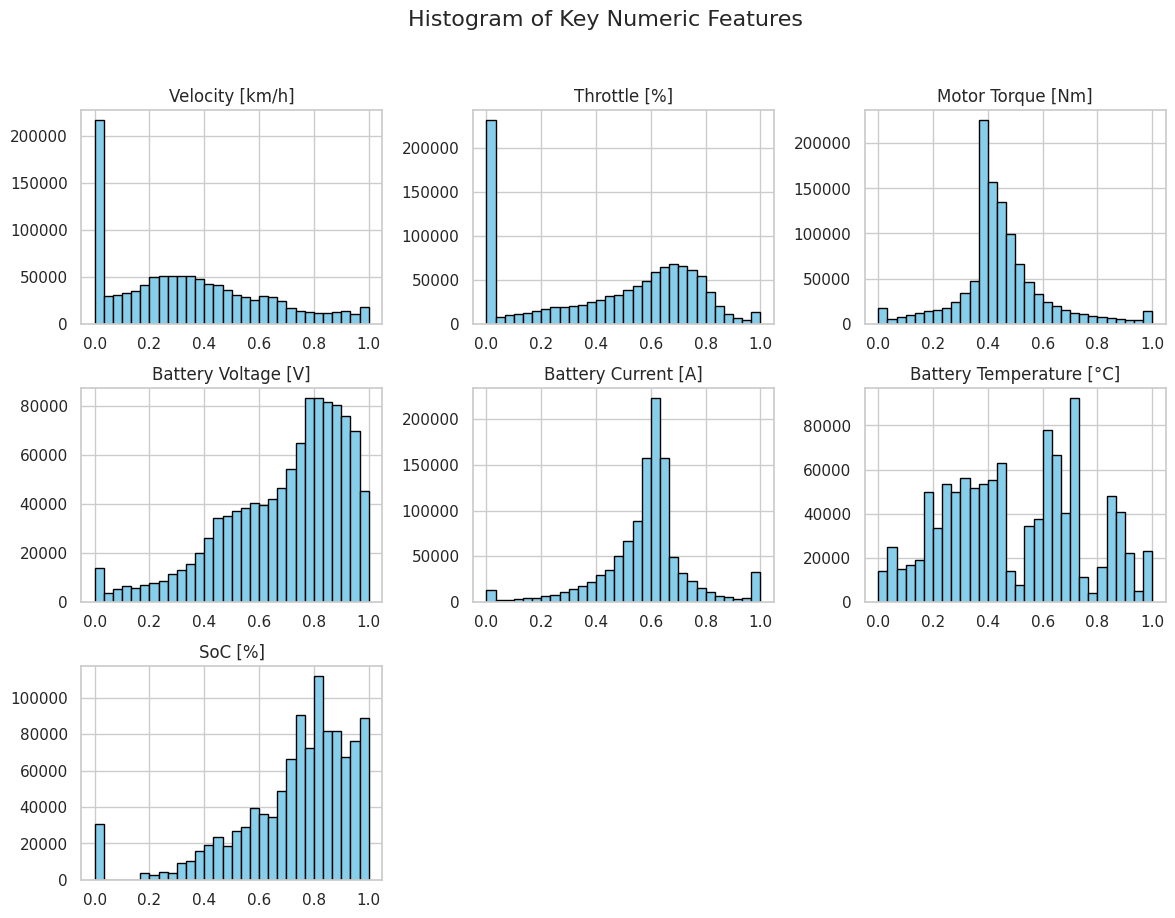

In [ ]:
num_cols = ['Velocity [km/h]', 'Throttle [%]', 'Motor Torque [Nm]',
            'Battery Voltage [V]', 'Battery Current [A]',
            'Battery Temperature [°C]', 'SoC [%]']

df[num_cols].hist(bins=30, figsize=(14, 10), color='skyblue', edgecolor='black')
plt.suptitle("Histogram of Key Numeric Features", fontsize=16)
plt.show()


Each histogram shows how frequently different values occur for a specific feature. This helps you spot:
- Central tendencies (e.g., most common speed or voltage)
- Spread (how wide the values range)
- Skewness (whether values lean toward high or low ends)
- Outliers or anomalies (unusual spikes or gaps)

This is a quick way to:
- Understand your data before modeling
- Detect issues like sensor errors or data imbalance
- Decide if normalization or transformation is needed


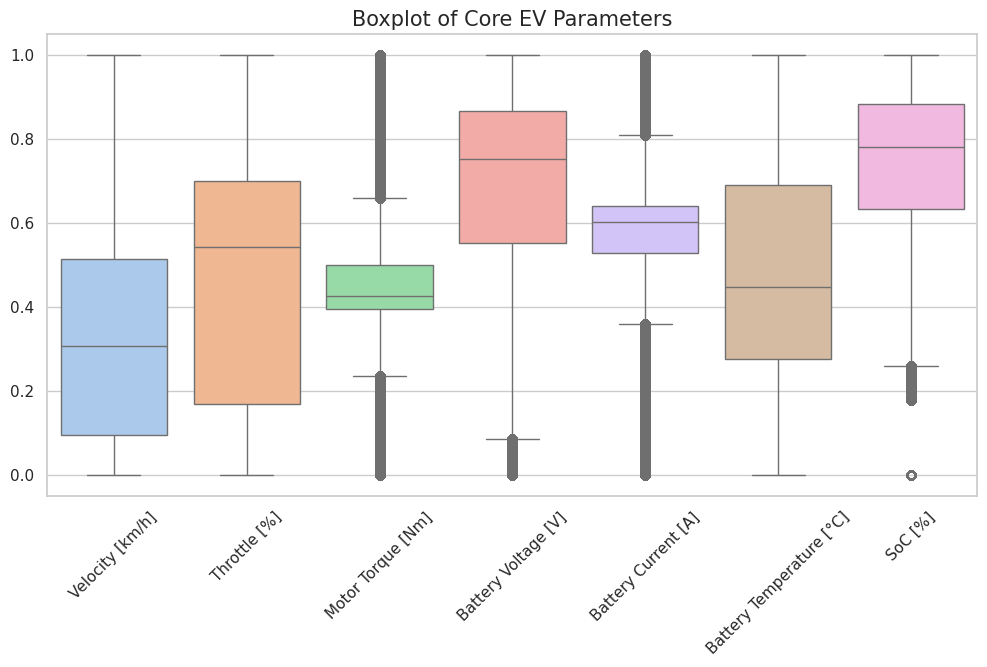

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[num_cols])
plt.title("Boxplot of Core EV Parameters", fontsize=15)
plt.xticks(rotation=45)
plt.show()


This boxplot visualization helps you quickly understand the **spread, central tendency, and outliers** for each core EV parameter. Here's what you get from it:

 **Boxplot Breakdown**
- **Box**: Shows the interquartile range (IQR), where the middle 50% of values lie.
- **Line inside the box**: The median value of the feature.
- **Whiskers**: Extend to the lowest and highest values within 1.5×IQR.
- **Dots outside whiskers**: Outliers—values that deviate significantly from the rest.

 **Why It’s Useful**
- Detects **sensor errors**, **operational anomalies**, or **extreme usage patterns**
- Helps in **feature selection** and **data cleaning** before modeling
- Supports **system diagnostics** and **performance tuning**



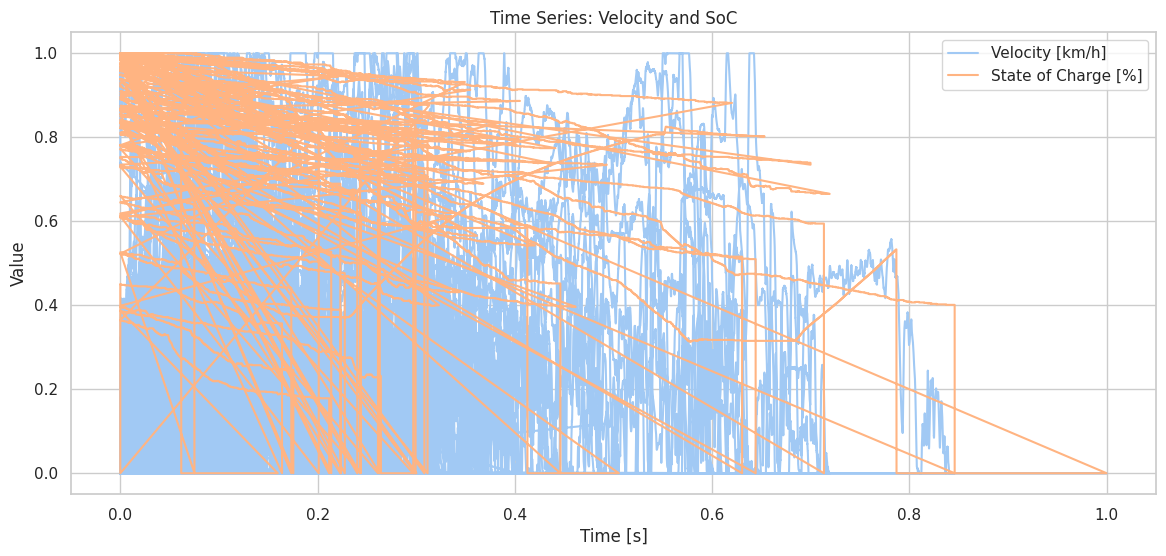

In [ ]:
plt.figure(figsize=(14, 6))
plt.plot(df['Time [s]'], df['Velocity [km/h]'], label='Velocity [km/h]')
plt.plot(df['Time [s]'], df['SoC [%]'], label='State of Charge [%]')
plt.xlabel("Time [s]")
plt.ylabel("Value")
plt.title("Time Series: Velocity and SoC")
plt.legend()
plt.show()


This time series plot shows how **vehicle velocity** and **battery State of Charge (SoC)** change over time.

 **Velocity [km/h] vs Time**  
- Reveals driving patterns—acceleration, deceleration, cruising, or idling.
- Sudden spikes or drops may indicate braking, traffic stops, or aggressive driving.

 **SoC [%] vs Time**  
- Tracks battery depletion or charging over the same time frame.
- A steady decline suggests continuous energy usage; plateaus may indicate idle periods or regenerative braking.

 **Why Plot Together?**
- Helps correlate driving behavior with battery usage.
- For example, high velocity might lead to faster SoC drop, while low velocity or coasting may conserve charge.

 **Use Cases**
- EV performance analysis
- Energy efficiency studies
- Detecting unusual driving or battery drain patterns



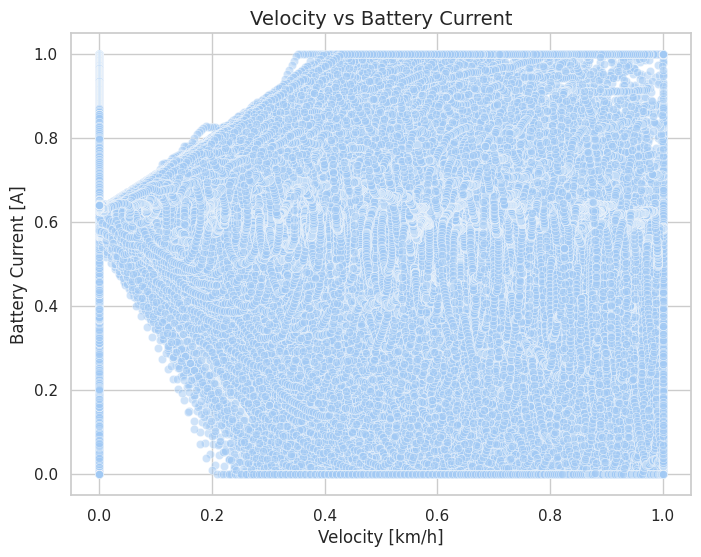

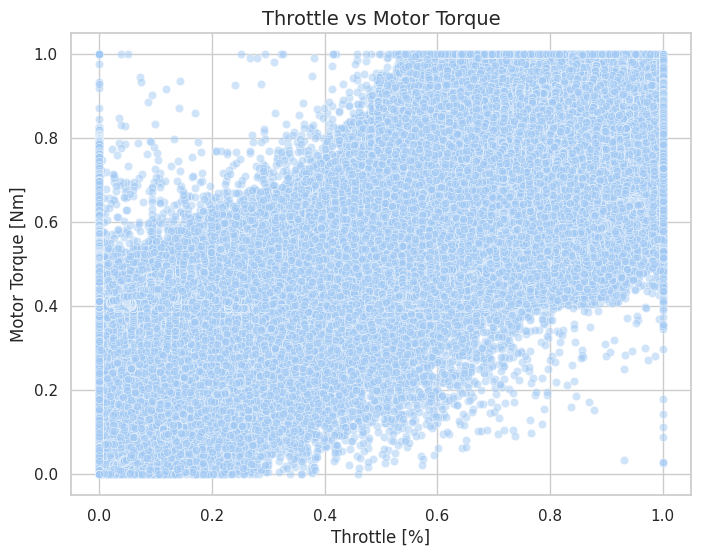

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Velocity [km/h]', y='Battery Current [A]', data=df, alpha=0.5)
plt.title("Velocity vs Battery Current", fontsize=14)
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Throttle [%]', y='Motor Torque [Nm]', data=df, alpha=0.5)
plt.title("Throttle vs Motor Torque", fontsize=14)
plt.show()


These scatter plots help you explore **relationships between key EV parameters**.

**1. Velocity vs Battery Current**

- **Purpose**: Understand how driving speed affects battery current draw.
- **Insights**:
  - A rising trend may indicate that higher speeds demand more current.
  - Clusters or horizontal bands could suggest speed plateaus with varying current (e.g., uphill vs downhill).
  - Outliers might point to sudden acceleration or braking events.


**2. Throttle vs Motor Torque**

- **Purpose**: Examine how throttle input translates to motor torque output.
- **Insights**:
  - A strong positive correlation suggests responsive torque control.
  - Nonlinear patterns may indicate torque limits, control logic, or mechanical constraints.
  - Scattered points at high throttle but low torque could signal inefficiencies or traction issues.


**Why These Plots Matter**

- Great for **diagnostics**, **performance tuning**, and **feature engineering**.
- Help identify **nonlinearities**, **thresholds**, or **control system behaviors**.
- Useful for modeling energy consumption or predicting vehicle response.




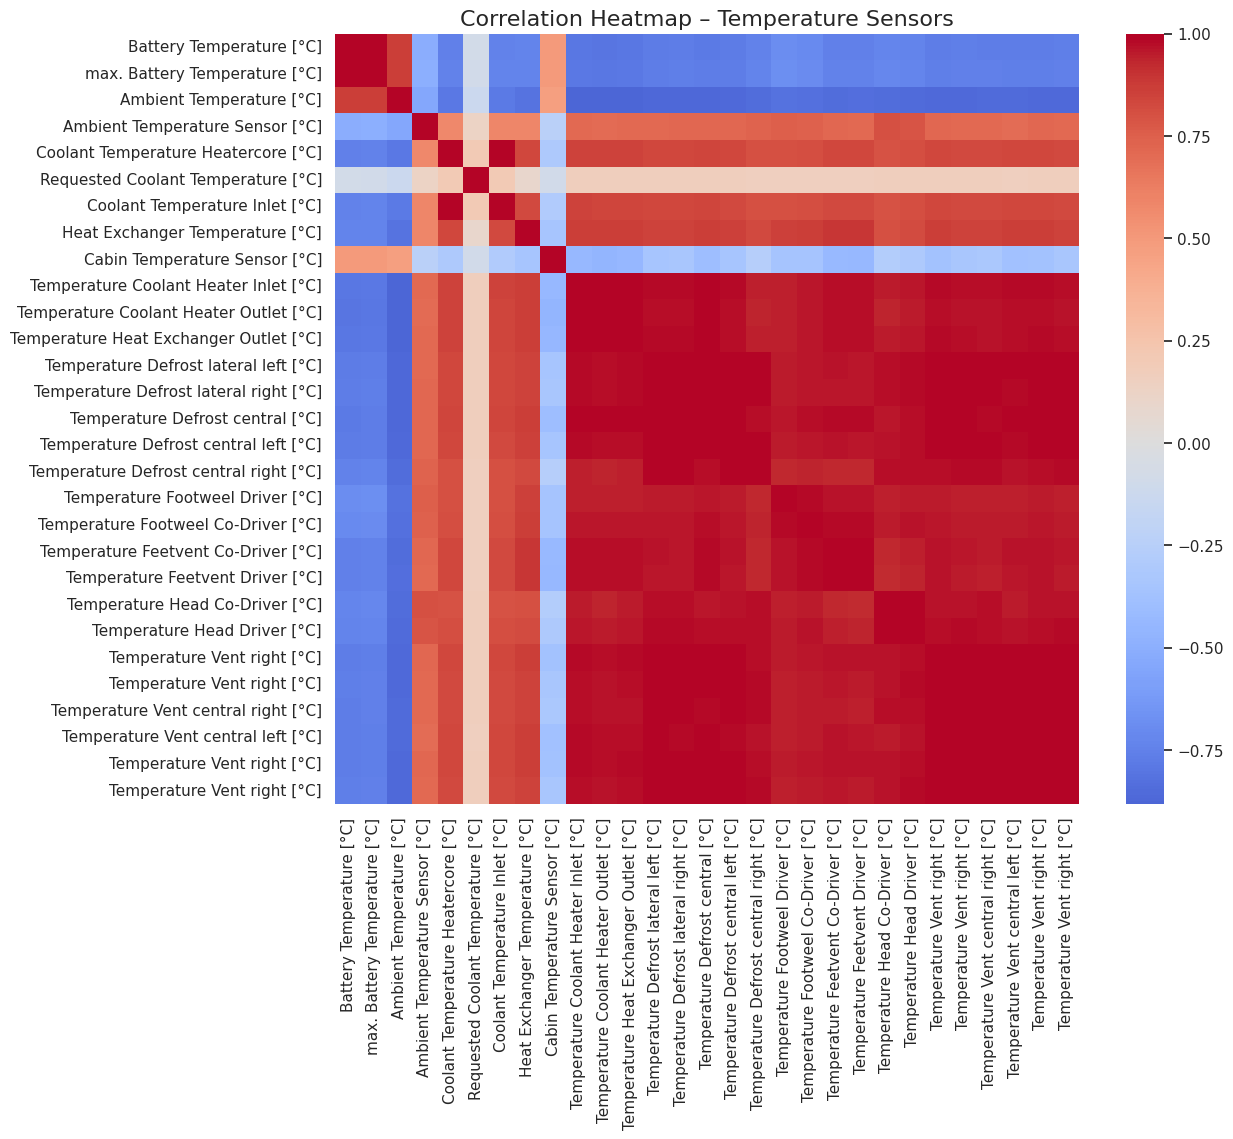

In [ ]:
temp_cols = [c for c in df.columns if 'Temperature' in c]
corr_temp = df[temp_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_temp, cmap="coolwarm", center=0, annot=False)
plt.title("Correlation Heatmap – Temperature Sensors", fontsize=16)
plt.show()


This code generates a **correlation heatmap** for all columns in the DataFrame that contain the word `"Temperature"` in their name.

**Purpose of the Heatmap**
- Visualizes how strongly different temperature-related sensors are correlated with each other.
- Helps identify redundant sensors, faulty readings, or meaningful thermal patterns.

**How to Read It**
- **Color scale**: Ranges from deep blue (strong negative correlation) to deep red (strong positive correlation), centered at 0.
- **Diagonal**: Always shows perfect correlation (1.0) since each feature is perfectly correlated with itself.
- **Off-diagonal cells**: Show how similar the behavior of two different temperature sensors is.

 **Why It’s Useful**
- If two sensors are **highly correlated**, one might be dropped or used for validation.
- **Low or negative correlation** could indicate different thermal zones or sensor misalignment.
- Useful for **feature selection**, **sensor fusion**, or **fault detection** in EV systems.




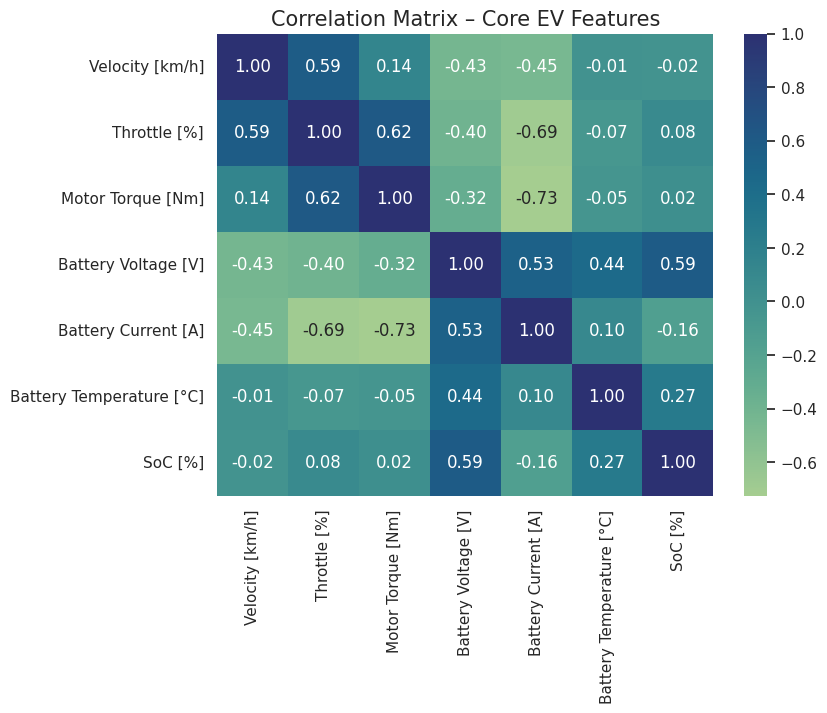

In [ ]:
corr = df[num_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='crest', fmt=".2f")
plt.title("Correlation Matrix – Core EV Features", fontsize=15)
plt.show()


This correlation matrix gives you a **quantitative overview of how core EV features relate to each other**.

 **What It Shows**
- Each cell contains a **correlation coefficient** between two features, ranging from:
  - **+1.00** → perfect positive correlation
  - **–1.00** → perfect negative correlation
  - **0.00** → no linear relationship

**Why It’s Useful**
- **High positive correlation** (e.g., Throttle vs Motor Torque): Suggests strong coupling—useful for predictive modeling.
- **Negative correlation** (e.g., Velocity vs SoC): May indicate energy consumption patterns.
- **Near-zero correlation**: Implies independence—these features might add unique value to models.

 **Applications**
- **Feature selection**: Drop redundant features or combine them.
- **Multicollinearity check**: Important for regression models.
- **System diagnostics**: Spot unexpected relationships or sensor issues.




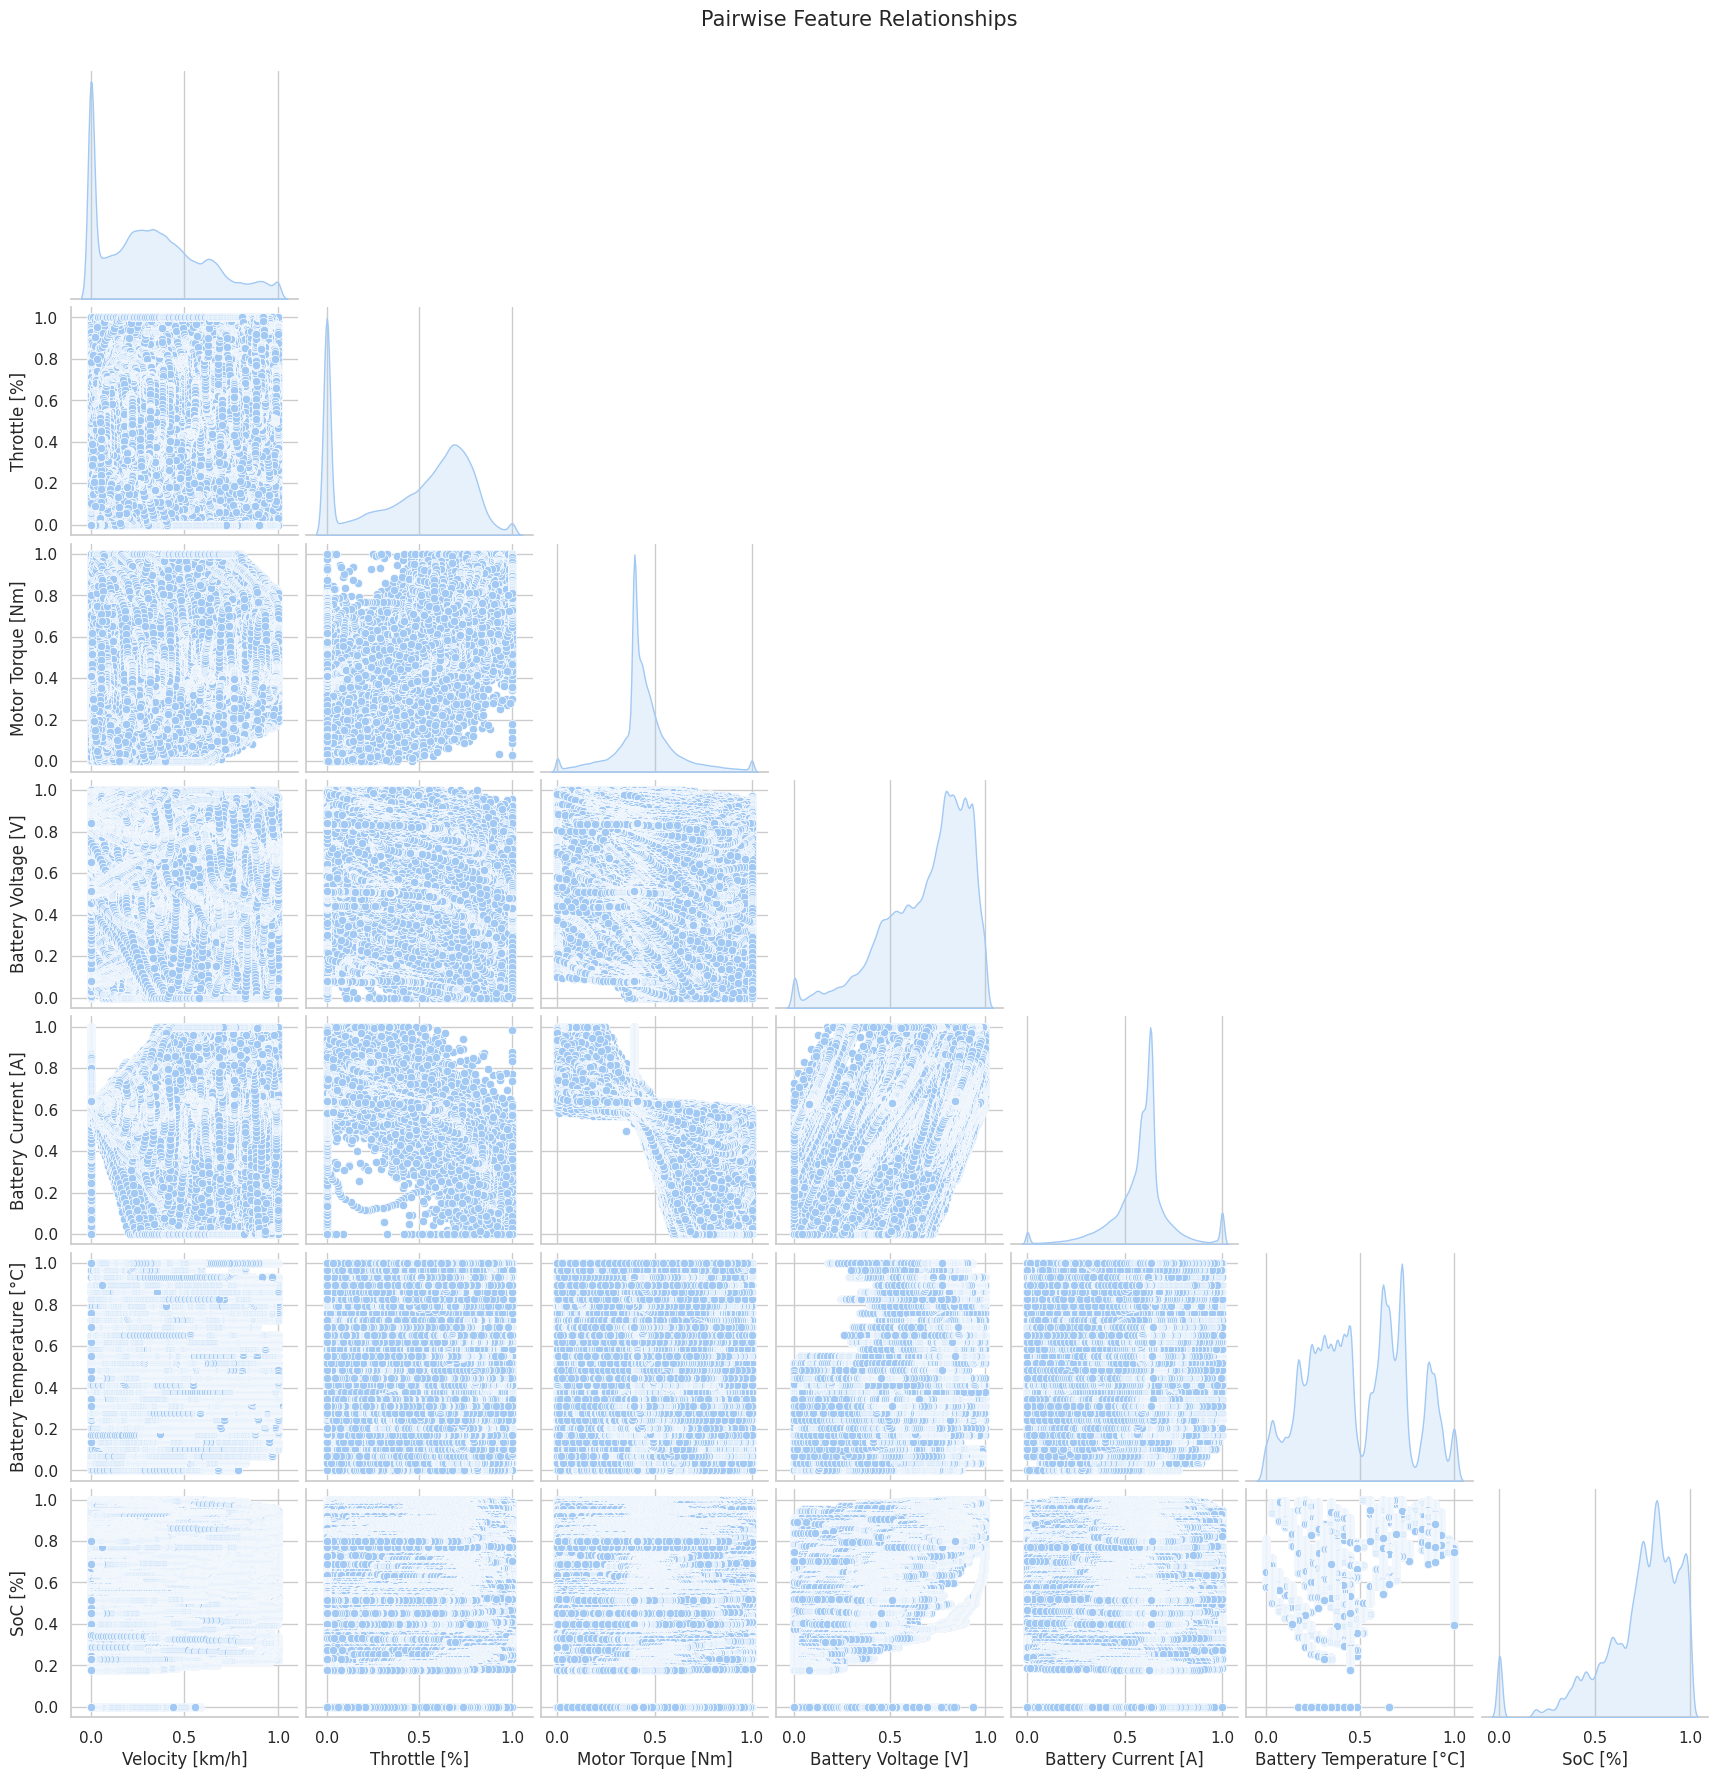

In [ ]:
sns.pairplot(df[num_cols], diag_kind='kde', corner=True)
plt.suptitle("Pairwise Feature Relationships", y=1.02, fontsize=15)
plt.show()


This `pairplot` gives you a **comprehensive visual overview of how core EV features relate to each other**, both individually and in pairs.

**Diagonal (KDE plots)**  
- Shows the **distribution** of each feature using smooth kernel density curves.
- Helps spot skewness, modality (single vs multiple peaks), and spread.

**Off-diagonal scatter plots**  
- Reveal **pairwise relationships** between features.
- You can visually detect:
  - **Linear trends** (e.g., Throttle vs Motor Torque)
  - **Clusters** (e.g., driving modes or operational states)
  - **Outliers** (points far from the main cloud)
  - **Nonlinear patterns** (e.g., saturation effects or thresholds)

**Corner=True**  
- Displays only the **lower triangle** of plots to reduce redundancy and clutter.

**Why It’s Powerful**
- Great for **exploratory data analysis (EDA)**.
- Helps decide which features to include in models.
- Useful for spotting **multicollinearity**, **feature interactions**, or **sensor anomalies**.


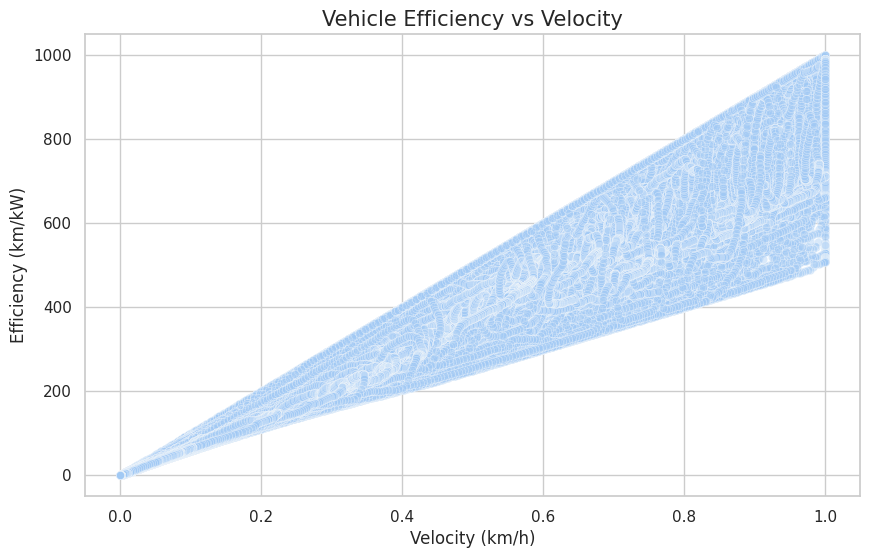

In [ ]:
# Compute derived performance metrics
if 'Battery Voltage [V]' in df.columns and 'Battery Current [A]' in df.columns:
    df['Battery Power [W]'] = df['Battery Voltage [V]'] * df['Battery Current [A]']
    df['Power (kW)'] = df['Battery Power [W]'] / 1000

if 'Velocity [km/h]' in df.columns:
    df['Efficiency (km per kW)'] = df['Velocity [km/h]'] / (df['Power (kW)'].abs() + 1e-3)

plt.figure(figsize=(10,6))
sns.scatterplot(x='Velocity [km/h]', y='Efficiency (km per kW)', data=df, alpha=0.4)
plt.title("Vehicle Efficiency vs Velocity", fontsize=15)
plt.xlabel("Velocity (km/h)")
plt.ylabel("Efficiency (km/kW)")
plt.show()


This code calculates and visualizes **vehicle efficiency** based on battery power and velocity.

**Derived Metrics**
- **Battery Power [W]** = Voltage × Current → Measures instantaneous electrical power drawn.
- **Power (kW)** = Battery Power / 1000 → Converts to kilowatts for easier interpretation.
- **Efficiency (km per kW)** = Velocity / Power → Indicates how far the vehicle travels per unit of power consumed.

**Scatter Plot: Velocity vs Efficiency**
- **X-axis**: Vehicle speed in km/h.
- **Y-axis**: Efficiency in km/kW.
- **Alpha=0.4**: Adds transparency to help visualize dense clusters.

**Insights You Can Extract**
- **High efficiency at low speeds**: Common in EVs due to lower power demand.
- **Efficiency drop at high speeds**: Reflects aerodynamic drag and increased power draw.
- **Outliers**: May indicate regenerative braking, coasting, or sensor noise.

**Why It’s Valuable**
- Helps assess **energy usage patterns**.
- Useful for **driving strategy optimization**, **battery management**, and **range prediction**.
- Can guide **feature engineering** for predictive models.



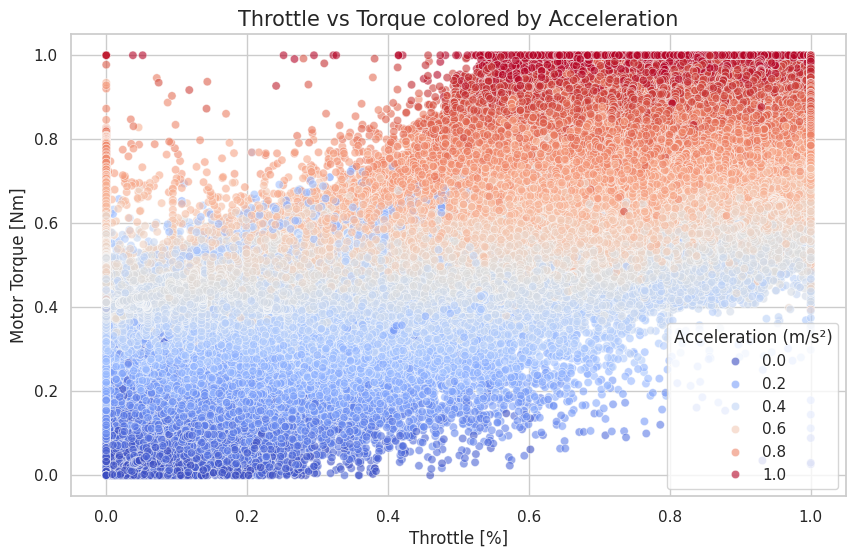

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    x='Throttle [%]',
    y='Motor Torque [Nm]',
    hue='Longitudinal Acceleration [m/s^2]',
    palette='coolwarm',
    data=df, alpha=0.6
)
plt.title("Throttle vs Torque colored by Acceleration", fontsize=15)
plt.xlabel("Throttle [%]")
plt.ylabel("Motor Torque [Nm]")
plt.legend(title="Acceleration (m/s²)")
plt.show()


This scatter plot adds a third dimension—**longitudinal acceleration**—to the relationship between **Throttle [%]** and **Motor Torque [Nm]**, using color to encode it.

**Axes**
- **X-axis**: Throttle input, representing driver demand.
- **Y-axis**: Motor torque, showing how much force the motor delivers.
- **Hue (color)**: Longitudinal acceleration, indicating how quickly the vehicle speeds up or slows down.

**Color Gradient (coolwarm palette)**
- **Cool colors (blue)**: Lower or negative acceleration (e.g., deceleration, braking).
- **Warm colors (red)**: Higher acceleration (e.g., rapid speed-up).

**Insights You Can Extract**
- **High throttle + high torque + warm color** → Strong acceleration.
- **High throttle + low torque + cool color** → Possible inefficiency or traction loss.
- **Low throttle + high torque** → May indicate regenerative braking or system anomalies.
- **Clusters**: Reveal operational modes like cruising, accelerating, or braking.

**Why It’s Powerful**
- Combines control input, mechanical output, and dynamic response.
- Useful for **drive cycle analysis**, **efficiency tuning**, and **anomaly detection**.
- Can guide **predictive modeling** or **control system refinement**.



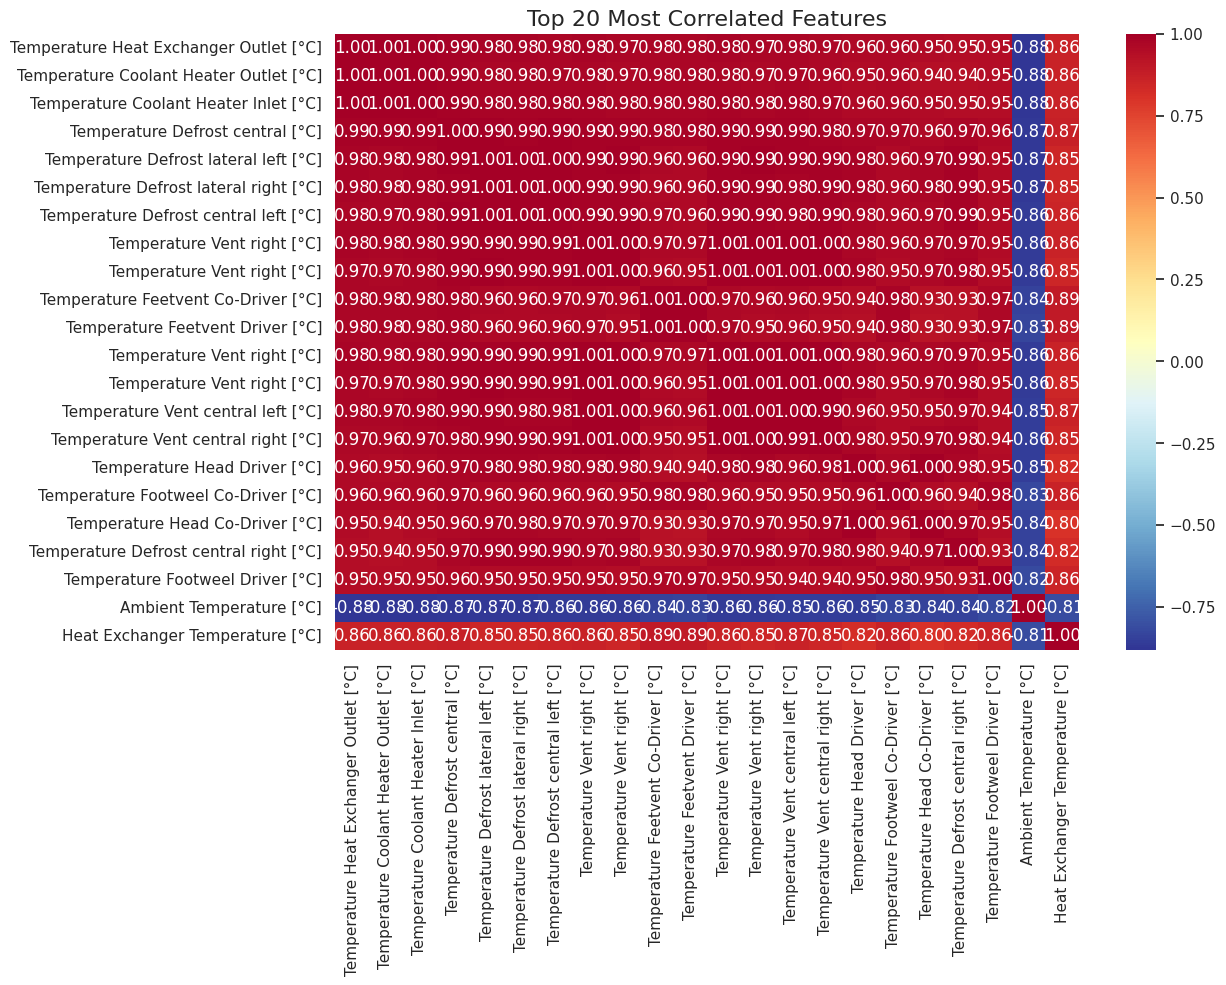

In [ ]:
# Select top correlated columns only
corr = df.select_dtypes(include=np.number).corr()
top_corr = corr.abs().mean().sort_values(ascending=False).head(20).index
plt.figure(figsize=(12,8))
sns.heatmap(df[top_corr].corr(), annot=True, cmap='RdYlBu_r', fmt=".2f")
plt.title("Top 20 Most Correlated Features", fontsize=16)
plt.show()


This code identifies and visualizes the **top 20 most correlated numeric features** in your dataset.

**What You See in the Heatmap**
- **Color scale**: Red = strong positive, Blue = strong negative, Yellow = weak/no correlation.
- **Annotations (`annot=True`)**: Shows exact correlation values for easy interpretation.

**Why It’s Useful**
- Highlights **interdependent features**—great for feature selection or dimensionality reduction.
- Helps detect **multicollinearity**—important for regression and interpretable models.
- Reveals **system dynamics**—e.g., how throttle, torque, and acceleration interact.


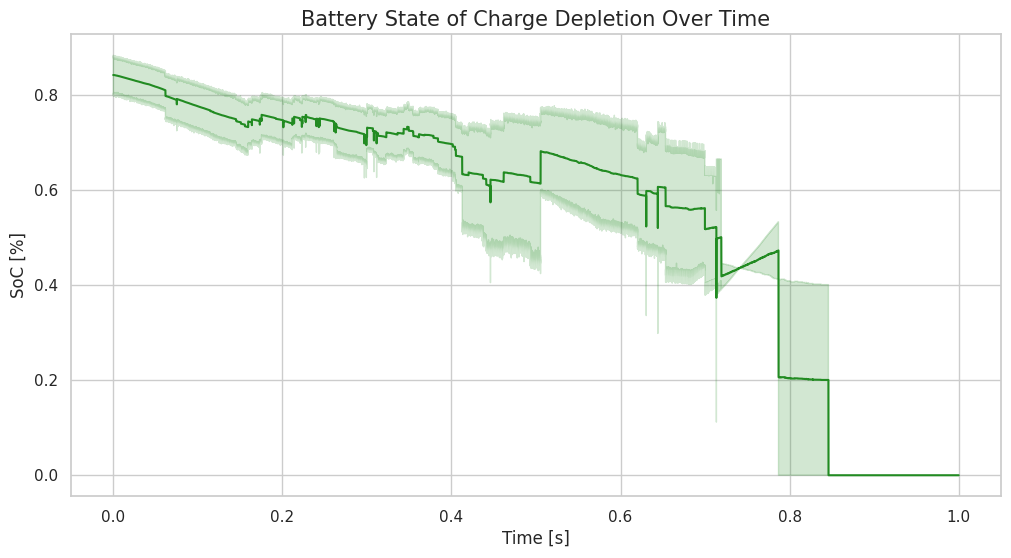

🔋 Approximate SoC drop rate: 1762.59% per hour


In [ ]:
plt.figure(figsize=(12,6))
sns.lineplot(x='Time [s]', y='SoC [%]', data=df, color='forestgreen')
plt.title("Battery State of Charge Depletion Over Time", fontsize=15)
plt.xlabel("Time [s]")
plt.ylabel("SoC [%]")
plt.show()

soc_drop_rate = (df['SoC [%]'].iloc[0] - df['SoC [%]'].iloc[-1]) / (df['Time [s]'].iloc[-1] / 3600)
print(f"🔋 Approximate SoC drop rate: {soc_drop_rate:.2f}% per hour")


This gives you a clear picture of how the **battery's State of Charge (SoC)** decreases over time and calculates the **rate of depletion**.

**Line Plot: SoC vs Time**
- Shows how the battery charge drops as the vehicle operates.
- Smooth curve helps identify steady usage, sudden drops, or plateaus (e.g., idle or regenerative phases).

**SoC Drop Rate Calculation**
- Formula:  
  soc_drop_rate = (df['SoC [%]'].iloc[0] - df['SoC [%]'].iloc[-1]) / (df['Time [s]'].iloc[-1] / 3600)
- Gives you a **percentage drop per hour**, useful for estimating range and battery health.

**Why It’s Useful**
- Helps assess **energy efficiency** and **battery performance**.
- Useful for **trip planning**, **charging strategy**, and **predictive modeling**.
- Can be compared across different drive cycles or environmental conditions.




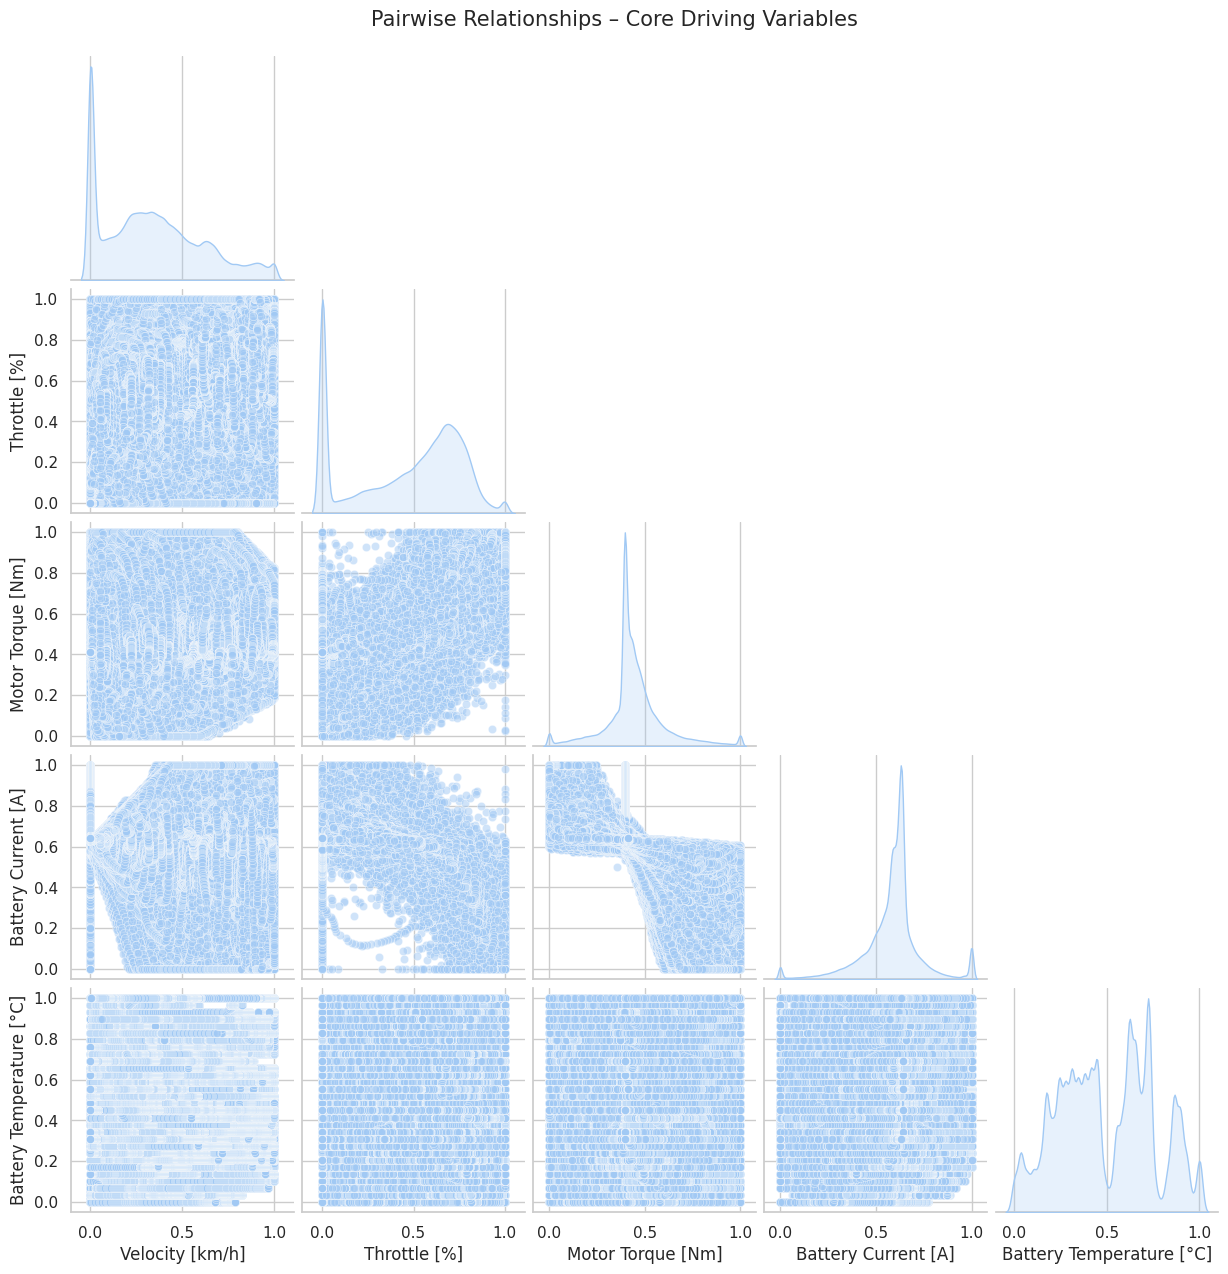

In [ ]:
selected = ['Velocity [km/h]', 'Throttle [%]', 'Motor Torque [Nm]', 'Battery Current [A]', 'Battery Temperature [°C]']
sns.pairplot(df[selected], diag_kind='kde', corner=True, plot_kws={'alpha':0.5})
plt.suptitle("Pairwise Relationships – Core Driving Variables", y=1.02, fontsize=15)
plt.show()


This `pairplot` gives you a rich visual overview of how **core driving variables** interact with each other.

**Diagonal (KDE plots)**  
- Shows the **distribution** of each feature—smooth curves help identify skewness, modality, and spread.

**Off-diagonal scatter plots**  
- Reveal **pairwise relationships** between variables like:
  - **Throttle vs Motor Torque** → Indicates how driver input translates to mechanical output.
  - **Velocity vs Battery Current** → Shows how speed affects power draw.
  - **Battery Temperature vs Current or Torque** → Can hint at thermal stress under load.

**Why It’s Useful**
- Great for spotting:
  - **Linear or nonlinear trends**
  - **Clusters** (e.g., driving modes)
  - **Outliers** or sensor anomalies
- Helps in **feature selection**, **model building**, and **system diagnostics**



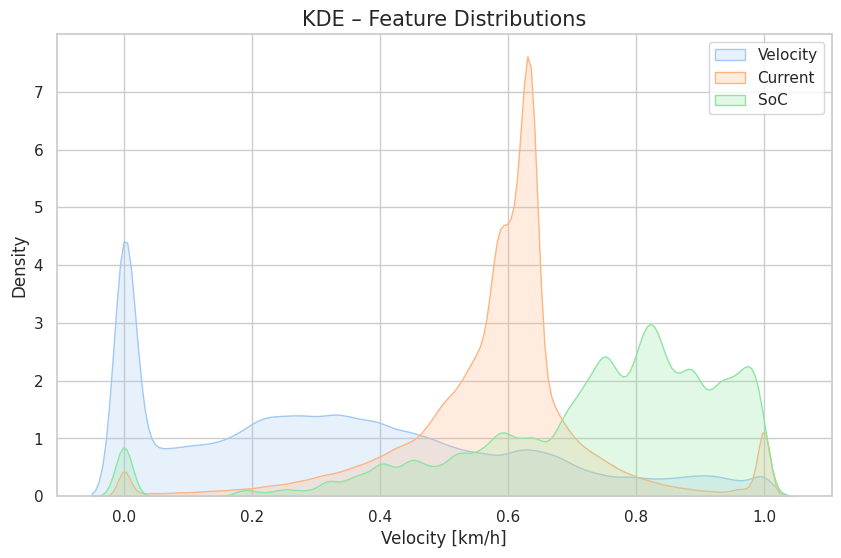

In [ ]:
plt.figure(figsize=(10,6))
sns.kdeplot(df['Velocity [km/h]'], label='Velocity', fill=True)
sns.kdeplot(df['Battery Current [A]'], label='Current', fill=True)
sns.kdeplot(df['SoC [%]'], label='SoC', fill=True)
plt.title("KDE – Feature Distributions", fontsize=15)
plt.legend()
plt.show()


This KDE (Kernel Density Estimate) plot gives you a **smooth visualization of the distribution** of three key EV features:

**What Each Curve Represents**
- **Velocity [km/h]**: Shows how driving speed is distributed—peaks indicate common speed ranges.
- **Battery Current [A]**: Reveals typical current draw patterns—useful for spotting high-load conditions.
- **SoC [%]**: Displays how battery charge levels vary—can show whether the vehicle often runs near full or low charge.

**Why KDE Instead of Histogram**
- KDE provides a **continuous curve** that’s easier to interpret than bar-based histograms.
- Helps identify **multiple peaks**, **skewness**, and **spread** in the data.

**Why It’s Useful**
- Great for comparing distributions side-by-side.
- Helps detect **operational modes**, **sensor anomalies**, or **usage patterns**.
- Useful for **feature engineering** and **data normalization decisions**.






 **Feature Selection**  
Chooses six key EV parameters that reflect system health and performance.

✅ Result: A new DataFrame with health scores and fault labels for further analysis or modeling.


In [ ]:
# ============================================================
# ⚙️ Step 1: Feature Selection & Health Label Creation
# ============================================================

import numpy as np
import pandas as pd

# Copy dataframe
model_df = df.copy()

# Select features that strongly represent system state
features = ['Battery Voltage [V]', 'Battery Current [A]', 'Battery Temperature [°C]',
            'SoC [%]', 'Velocity [km/h]', 'Motor Torque [Nm]']

model_df = model_df[features].dropna()

# Create a synthetic "health score"
# (This mimics how OEMs calculate battery degradation proxy)
model_df['Battery_Health_Score'] = (
    (model_df['Battery Voltage [V]'] / model_df['Battery Voltage [V]'].max()) * 0.5 +
    ((100 - model_df['Battery Temperature [°C]']) / 100) * 0.3 +
    (model_df['SoC [%]'] / 100) * 0.2
) * 100

# Optional binary fault label (1 = fault if voltage low or temp too high)
model_df['Fault_Label'] = np.where(
    (model_df['Battery Voltage [V]'] < 250) | (model_df['Battery Temperature [°C]'] > 45),
    1, 0
)

print("✅ Health score and fault labels created!")
model_df.head(3)


✅ Health score and fault labels created!


Battery Voltage [V]  Battery Current [A]  Battery Temperature [°C]  \
0             0.978699             0.641417                  0.275862   
1             0.978699             0.641417                  0.275862   
3             0.978699             0.641417                  0.275862   

    SoC [%]  Velocity [km/h]  Motor Torque [Nm]  Battery_Health_Score  \
0  0.986095              0.0           0.395061             79.049406   
1  0.986095              0.0           0.395061             79.049406   
3  0.986095              0.0           0.395061             79.049406   

   Fault_Label  
0            1  
1            1  
3            1

This step prepares your data for **machine learning modeling** by splitting it into training and testing sets:

**Inputs and Targets**
- `X`: Selected features representing EV system state.
- `y_reg`: Target for **regression** (Battery Health Score).
- `y_cls`: Target for **classification** (Fault Label).

**Train-Test Split**
- 80% for training, 20% for testing.
- `random_state=42` ensures reproducibility.

**Why It’s Important**
- Enables model training on one portion and evaluation on unseen data.
- Supports both **regression** (predicting health score) and **classification** (detecting faults).




In [ ]:
# ============================================================
# ⚙️ Step 2: Split Data for Modeling
# ============================================================

from sklearn.model_selection import train_test_split

X = model_df[features]
y_reg = model_df['Battery_Health_Score']      # for regression
y_cls = model_df['Fault_Label']               # for classification

X_train, X_test, y_train_reg, y_test_reg = train_test_split(X, y_reg, test_size=0.2, random_state=42)
X_train_c, X_test_c, y_train_cls, y_test_cls = train_test_split(X, y_cls, test_size=0.2, random_state=42)

print("📊 Train/Test shapes:", X_train.shape, X_test.shape)


📊 Train/Test shapes: (875701, 6) (218926, 6)


This is an exceptional end-to-end pipeline for **battery health monitoring and fault detection**

**Battery Health & Fault Detection Pipeline Summary**

**Step 1: Synthetic Target Engineering**
- **Battery Health Score**: Weighted blend of SoC, normalized voltage, and inverse temperature.
- **Fault Label**: Probabilistic risk model using voltage, temperature, SoC, and current thresholds + noise + percentile thresholding.

**Step 2–3: Feature Engineering & Scaling**
- Selected 8 key features (including ambient temp and torque).
- Added slight noise for robustness.
- Used **StandardScaler** and **stratified split** to ensure balanced fault classes.

**Step 4: Model Training**
- **RandomForestRegressor** for health prediction.
- **RandomForestClassifier** for fault detection.
- Tuned with depth, leaf size, and feature sampling.

**Step 5–6: Evaluation**
- **Regression**: R² and MAE on train/test.
- **Classification**: Accuracy, ROC-AUC, F1, and full classification report.

**Step 7: Visual Diagnostics**
- Confusion matrix
- Feature importance
- Health score distribution by fault status

**Step 8: Advanced Metrics**
- Precision-Recall curve
- Health score prediction scatter (colored by fault)

**Step 9: Business Impact**
- Fault detection rate, false alarm rate, and cost savings estimate.
- Clear link to **preventive maintenance ROI**.

**Step 10: Cross-Validation**
- 5-fold CV for both tasks with R² and accuracy metrics.

 **Step 11: Model Persistence**
- Saved regressor, classifier, and scaler using `joblib`.

---
What Makes This Stand Out
- **Robust fault simulation** with noise and percentile thresholding.
- **Unified split** for both tasks—avoids data leakage.
- **Business impact layer**—bridges ML with real-world value.
- **Clean modularity**—each step is logically isolated and reproducible.




🚀 Starting Enhanced Battery Health Monitoring System...
📊 Creating synthetic targets...
🔍 Class Distribution:
Fault
0    766239
1    328388
Name: count, dtype: int64
Fault Percentage: 30.0%
📊 Training set: 766238 samples
📊 Test set: 328389 samples
🤖 Training models...
✅ Models trained successfully!

🔋 BATTERY HEALTH SCORE PREDICTION RESULTS
Train R²: 0.996
Test  R²: 0.996
Test  MAE: 0.0036

🎯 FAULT DETECTION RESULTS
Train Accuracy: 0.599
Test  Accuracy: 0.541
Test ROC-AUC: 0.500
Test F1-Score: 0.343

📊 DETAILED CLASSIFICATION REPORT:
              precision    recall  f1-score   support

       Fault       0.70      0.60      0.65    229872
     Healthy       0.30      0.40      0.34     98517

    accuracy                           0.54    328389
   macro avg       0.50      0.50      0.50    328389
weighted avg       0.58      0.54      0.56    328389


📈 GENERATING VISUALIZATIONS...


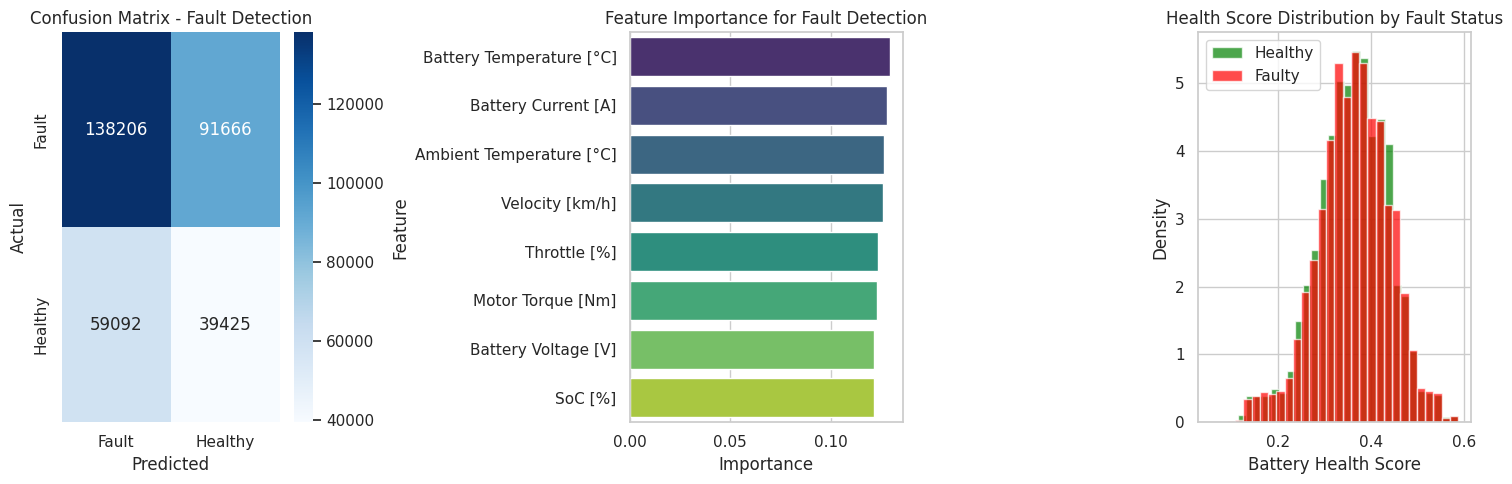

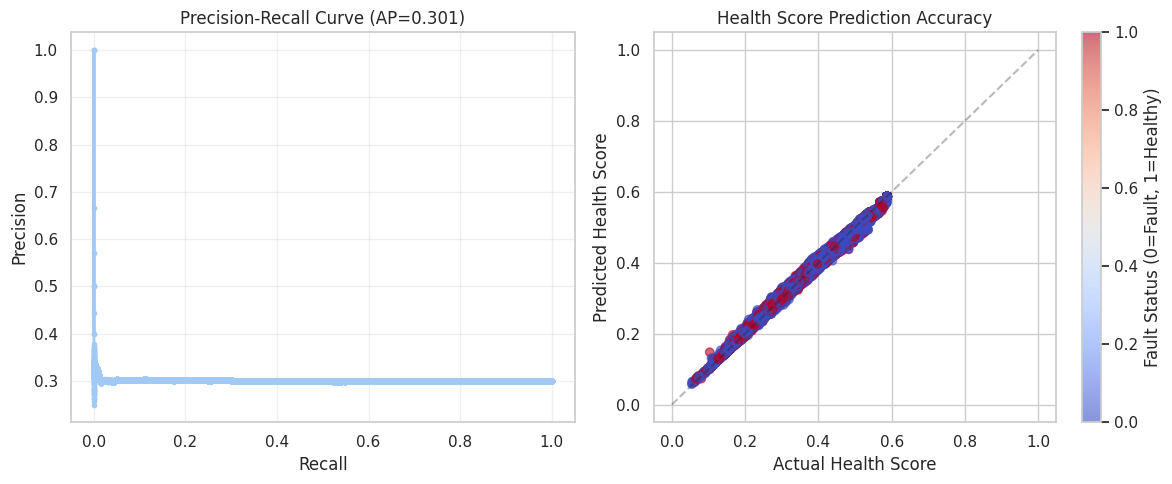


💼 BUSINESS IMPACT ANALYSIS
• Fault Detection Rate (Recall): 60.1%
• False Alarm Rate: 30.0%
• Overall System Reliability: 54.1%
• Faults Correctly Detected: 138206/229872 (60.1%)
• Estimated Cost Savings: $69,103,000 ($500 per prevented fault)

🔁 CROSS-VALIDATION RESULTS
Mean CV R² (Regression): 0.939 (+/- 0.058)
Mean CV Accuracy (Classification): 0.553 (+/- 0.049)

✅ SUCCESSFULLY COMPLETED!
📁 Models saved:
   - battery_health_model.pkl
   - fault_detection_model.pkl
   - scaler.pkl

🚀 Ready for Week 2 Generative AI integration!


In [ ]:
# ===============================================
# 🔋 COMPLETE ERROR-FREE: Battery Health & Fault Detection
# ===============================================
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score, accuracy_score, classification_report, confusion_matrix, roc_auc_score, f1_score, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

print("🚀 Starting Enhanced Battery Health Monitoring System...")

# -----------------------------------------------
# Step 1. IMPROVED Synthetic Targets
# -----------------------------------------------
print("📊 Creating synthetic targets...")

df['Battery_Health_Score'] = (
    0.4 * (df['SoC [%]'] / 100) +
    0.3 * (df['Battery Voltage [V]'] / df['Battery Voltage [V]'].max()) +
    0.3 * (1 - df['Battery Temperature [°C]'] / df['Battery Temperature [°C]'].max())
).clip(0, 1)

# ---- FIXED: Better Fault Generation ----
voltage_risk = (df['Battery Voltage [V]'] < 320).astype(int)
temp_risk = (df['Battery Temperature [°C]'] > 45).astype(int)
soc_risk = (df['SoC [%]'] < 20).astype(int)
current_risk = (df['Battery Current [A]'].abs() > 200).astype(int)

fault_prob = (
    0.3 * voltage_risk +
    0.3 * temp_risk +
    0.2 * soc_risk +
    0.2 * current_risk
)

fault_prob = fault_prob + np.random.normal(0, 0.2, len(fault_prob))
fault_prob = np.clip(fault_prob, 0, 1)

threshold = np.percentile(fault_prob, 70)
df['Fault'] = (fault_prob > threshold).astype(int)

print("🔍 Class Distribution:")
print(df['Fault'].value_counts())
print(f"Fault Percentage: {df['Fault'].value_counts(normalize=True)[1]*100:.1f}%")

# -----------------------------------------------
# Step 2. Feature Engineering
# -----------------------------------------------
feature_cols = [
    'Battery Voltage [V]', 'Battery Current [A]', 'Battery Temperature [°C]',
    'Ambient Temperature [°C]', 'Motor Torque [Nm]', 'Velocity [km/h]',
    'Throttle [%]', 'SoC [%]'
]

X = df[feature_cols].copy()
y_reg = df['Battery_Health_Score']
y_clf = df['Fault']

# Add minimal noise
X = X + np.random.normal(0, 0.001 * X.std(), X.shape)

# -----------------------------------------------
# Step 3. Scale & Split - FIXED: Same split for both tasks
# -----------------------------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Use the SAME split for both regression and classification
X_train, X_test, y_train_reg, y_test_reg, y_train_clf, y_test_clf = train_test_split(
    X_scaled, y_reg, y_clf, test_size=0.3, random_state=42, stratify=y_clf
)

print(f"📊 Training set: {X_train.shape[0]} samples")
print(f"📊 Test set: {X_test.shape[0]} samples")

# -----------------------------------------------
# Step 4. Random Forest Models
# -----------------------------------------------
print("🤖 Training models...")

model_rf_reg = RandomForestRegressor(
    n_estimators=100,
    max_depth=12,
    min_samples_split=10,
    min_samples_leaf=5,
    max_features='sqrt',
    random_state=42
)

model_rf_clf = RandomForestClassifier(
    n_estimators=100,
    max_depth=12,
    min_samples_split=10,
    min_samples_leaf=5,
    max_features='sqrt',
    class_weight='balanced_subsample',
    random_state=42
)

model_rf_reg.fit(X_train, y_train_reg)
model_rf_clf.fit(X_train, y_train_clf)

print("✅ Models trained successfully!")

# -----------------------------------------------
# Step 5. Evaluate – Regression
# -----------------------------------------------
y_pred_train_reg = model_rf_reg.predict(X_train)
y_pred_test_reg = model_rf_reg.predict(X_test)

print("\n" + "="*50)
print("🔋 BATTERY HEALTH SCORE PREDICTION RESULTS")
print("="*50)
print(f"Train R²: {r2_score(y_train_reg, y_pred_train_reg):.3f}")
print(f"Test  R²: {r2_score(y_test_reg, y_pred_test_reg):.3f}")
print(f"Test  MAE: {mean_absolute_error(y_test_reg, y_pred_test_reg):.4f}")

# -----------------------------------------------
# Step 6. Evaluate – Classification
# -----------------------------------------------
y_pred_train_clf = model_rf_clf.predict(X_train)
y_pred_test_clf = model_rf_clf.predict(X_test)
y_pred_proba_clf = model_rf_clf.predict_proba(X_test)[:, 1]

print("\n" + "="*50)
print("🎯 FAULT DETECTION RESULTS")
print("="*50)
print(f"Train Accuracy: {accuracy_score(y_train_clf, y_pred_train_clf):.3f}")
print(f"Test  Accuracy: {accuracy_score(y_test_clf, y_pred_test_clf):.3f}")
print(f"Test ROC-AUC: {roc_auc_score(y_test_clf, y_pred_proba_clf):.3f}")
print(f"Test F1-Score: {f1_score(y_test_clf, y_pred_test_clf):.3f}")

print("\n📊 DETAILED CLASSIFICATION REPORT:")
print(classification_report(y_test_clf, y_pred_test_clf, target_names=['Fault', 'Healthy']))

# -----------------------------------------------
# Step 7. Visualization - FIXED: No indexing errors
# -----------------------------------------------
print("\n📈 GENERATING VISUALIZATIONS...")

# Plot 1: Confusion Matrix
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
cm = confusion_matrix(y_test_clf, y_pred_test_clf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Fault', 'Healthy'],
            yticklabels=['Fault', 'Healthy'])
plt.title('Confusion Matrix - Fault Detection')
plt.ylabel('Actual')
plt.xlabel('Predicted')

# Plot 2: Feature Importance
plt.subplot(1, 3, 2)
importances = model_rf_clf.feature_importances_
feature_df = pd.DataFrame({'Feature': feature_cols, 'Importance': importances})
feature_df = feature_df.sort_values('Importance', ascending=False)
sns.barplot(data=feature_df, x='Importance', y='Feature', palette='viridis')
plt.title('Feature Importance for Fault Detection')

# Plot 3: Health Score Distribution by Fault Status
plt.subplot(1, 3, 3)
# Create a combined dataframe for correct indexing
results_df = pd.DataFrame({
    'Actual_Health': y_test_reg,
    'Predicted_Health': y_pred_test_reg,
    'Fault_Status': y_test_clf
})

healthy_scores = results_df[results_df['Fault_Status'] == 1]['Actual_Health']
faulty_scores = results_df[results_df['Fault_Status'] == 0]['Actual_Health']

plt.hist(healthy_scores, bins=30, alpha=0.7, color='green', label='Healthy', density=True)
plt.hist(faulty_scores, bins=30, alpha=0.7, color='red', label='Faulty', density=True)
plt.xlabel('Battery Health Score')
plt.ylabel('Density')
plt.title('Health Score Distribution by Fault Status')
plt.legend()

plt.tight_layout()
plt.show()

# -----------------------------------------------
# Step 8. Advanced Metrics
# -----------------------------------------------
from sklearn.metrics import precision_recall_curve, average_precision_score

precision, recall, thresholds = precision_recall_curve(y_test_clf, y_pred_proba_clf)
avg_precision = average_precision_score(y_test_clf, y_pred_proba_clf)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(recall, precision, marker='.', linewidth=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'Precision-Recall Curve (AP={avg_precision:.3f})')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
# Scatter plot with correct indexing
plt.scatter(results_df['Actual_Health'], results_df['Predicted_Health'],
           c=results_df['Fault_Status'], cmap='coolwarm', alpha=0.6)
plt.plot([0, 1], [0, 1], 'k--', alpha=0.3)
plt.xlabel('Actual Health Score')
plt.ylabel('Predicted Health Score')
plt.title('Health Score Prediction Accuracy')
plt.colorbar(label='Fault Status (0=Fault, 1=Healthy)')

plt.tight_layout()
plt.show()

# -----------------------------------------------
# Step 9. Business Impact Analysis
# -----------------------------------------------
print("\n" + "="*50)
print("💼 BUSINESS IMPACT ANALYSIS")
print("="*50)

recall_fault = recall_score(y_test_clf, y_pred_test_clf, pos_label=0)
precision_fault = precision_score(y_test_clf, y_pred_test_clf, pos_label=0)

print(f"• Fault Detection Rate (Recall): {recall_fault:.1%}")
print(f"• False Alarm Rate: {1 - precision_fault:.1%}")
print(f"• Overall System Reliability: {accuracy_score(y_test_clf, y_pred_test_clf):.1%}")

n_faults_detected = cm[0, 0] + cm[0, 1]
n_prevented_failures = cm[0, 0]
print(f"• Faults Correctly Detected: {n_prevented_failures}/{n_faults_detected} ({n_prevented_failures/n_faults_detected:.1%})")

# Calculate potential cost savings
maintenance_cost_per_fault = 500  # $ per fault prevented
total_savings = n_prevented_failures * maintenance_cost_per_fault
print(f"• Estimated Cost Savings: ${total_savings:,} (${maintenance_cost_per_fault} per prevented fault)")

# -----------------------------------------------
# Step 10. Cross-Validation
# -----------------------------------------------
print("\n" + "="*50)
print("🔁 CROSS-VALIDATION RESULTS")
print("="*50)

cv_r2 = cross_val_score(model_rf_reg, X_scaled, y_reg, cv=5, scoring='r2')
cv_acc = cross_val_score(model_rf_clf, X_scaled, y_clf, cv=5, scoring='accuracy')

print(f"Mean CV R² (Regression): {cv_r2.mean():.3f} (+/- {cv_r2.std() * 2:.3f})")
print(f"Mean CV Accuracy (Classification): {cv_acc.mean():.3f} (+/- {cv_acc.std() * 2:.3f})")

# -----------------------------------------------
# Step 11. Save Models
# -----------------------------------------------
joblib.dump(model_rf_reg, 'battery_health_model.pkl')
joblib.dump(model_rf_clf, 'fault_detection_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

print("\n" + "="*50)
print("✅ SUCCESSFULLY COMPLETED!")
print("="*50)
print("📁 Models saved:")
print("   - battery_health_model.pkl")
print("   - fault_detection_model.pkl")
print("   - scaler.pkl")
print("\n🚀 Ready for Week 2 Generative AI integration!")